In [1]:
import os  
import random
import cv2
import numpy as np
from matplotlib import pyplot as plt
from segmentation_models.backbones import get_preprocessing

from image_utils import ImageUtils
from model_utils import ModelUtils
from process_results import ProcessResults

Using TensorFlow backend.
/home/andrea/env/diplomka3/lib/python3.6/site-packages/classification_models/resnext/__init__.py:4: UserWarning: Current ResNext models are deprecated, use keras.applications ResNeXt models
  warnings.warn('Current ResNext models are deprecated, '


## Initialize

In [2]:
val_frame_path = '/home/andrea/learning/vessel_segmentation/disk/val_imgs/val'
val_mask_path = '/home/andrea/learning/vessel_segmentation/disk/val_masks/val'

img_height = 768
img_width = 768

backbone = 'resnet18'

preprocess_input = get_preprocessing(backbone)
image_ut = ImageUtils(val_frame_path, val_mask_path, img_height, img_width, architecture='unet')
process_results = ProcessResults()

## Load model

In [3]:
model_RESNET18_150 = ModelUtils.load_model('models/model_unet_disk_pretrainedRESNET18_6')

Instructions for updating:
Colocations handled automatically by placer.
Loaded model from disk


## Filtering and tresholding predicted images

In [6]:
process_results.predict_images(backbone='resnet18',
                               val_frame_path=val_frame_path,
                               val_mask_path=val_mask_path,
                               model=model_RESNET18_150,
                               img_height=img_height,
                               img_width=img_width)

In [8]:
filtered_images = []

for im in process_results._predicted_imgs:
    filt_img = process_results.med_ext_med_filter(im)
    filtered_images.append(process_results.tresholding(filt_img))

## Plot predicted masks

In [12]:
def draw_found_contours(origin_images, filtered_images, masks):
    for idx in range(len(origin_images)):
        contours = measure.find_contours(filtered_images[idx], 0.8)

        plt.figure()
        fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=1, ncols=4, figsize=(15,10))
        
        ax1.set_title('Image')
        ax1.imshow(origin_images[idx], interpolation='nearest', cmap=plt.cm.gray)

        ax2.set_title('Mask')
        ax2.imshow(np.squeeze(masks[idx]), cmap='gray')
        
        ax3.set_title('Predicted_image')
        ax3.imshow(filtered_images[idx], cmap='gray')
        
        ax4.set_title('Predicted contour in image')
        ax4.imshow(origin_images[idx], interpolation='nearest', cmap=plt.cm.gray)
        
        for n, contour in enumerate(contours):
            ax4.plot(contour[:, 1], contour[:, 0], linewidth=4, color='magenta')
        ax4.plot(contour[:, 1], contour[:, 0], linewidth=4, color='magenta')

<Figure size 432x288 with 0 Axes>

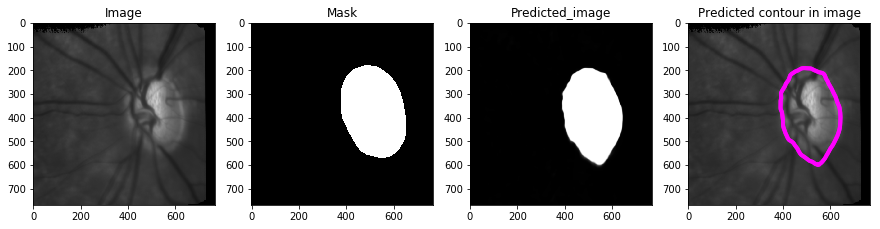

<Figure size 432x288 with 0 Axes>

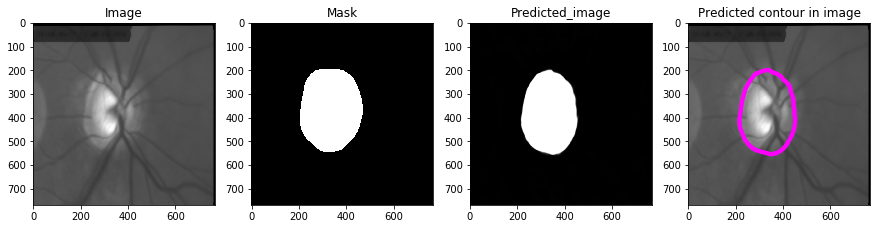

<Figure size 432x288 with 0 Axes>

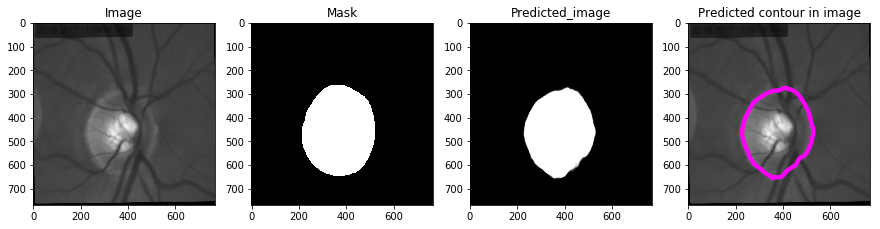

<Figure size 432x288 with 0 Axes>

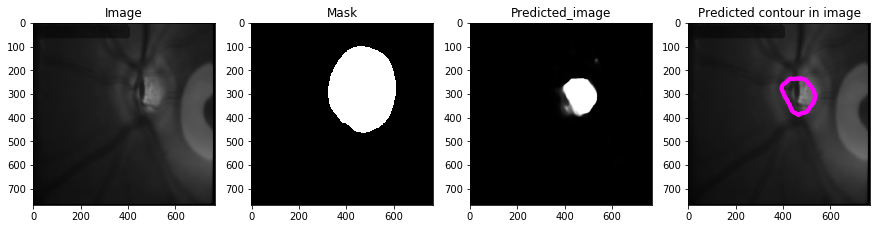

<Figure size 432x288 with 0 Axes>

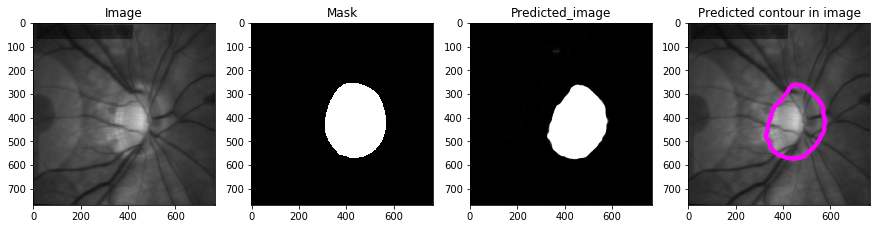

<Figure size 432x288 with 0 Axes>

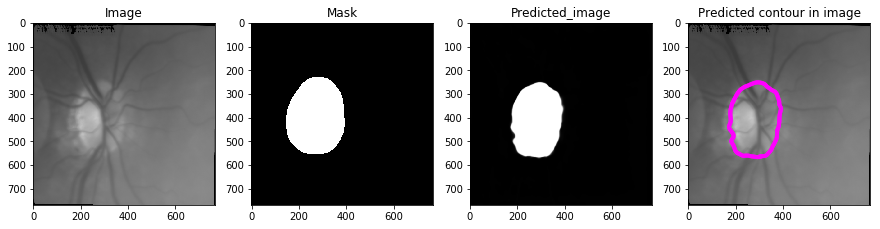

<Figure size 432x288 with 0 Axes>

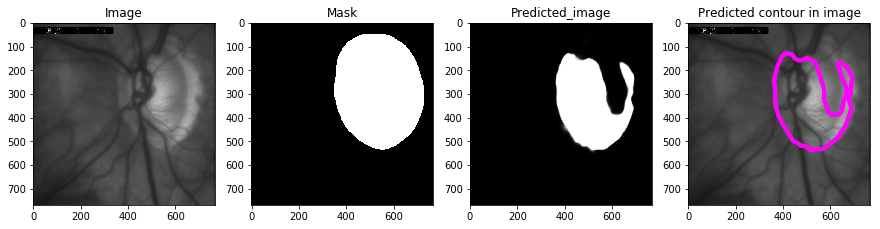

<Figure size 432x288 with 0 Axes>

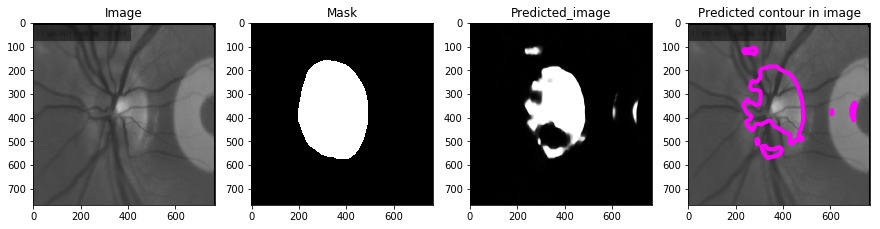

<Figure size 432x288 with 0 Axes>

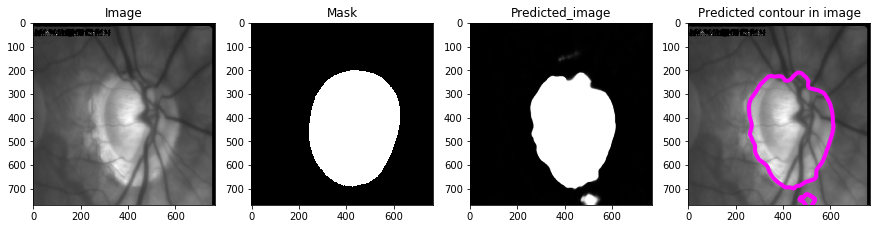

<Figure size 432x288 with 0 Axes>

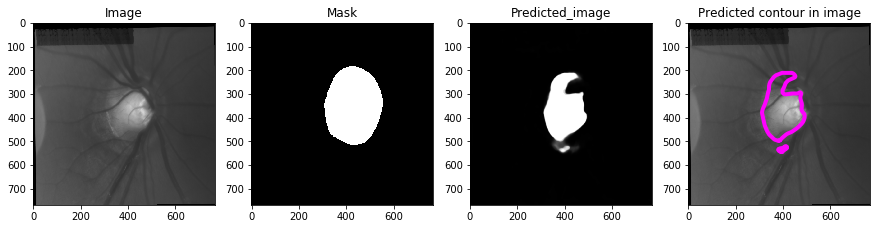

<Figure size 432x288 with 0 Axes>

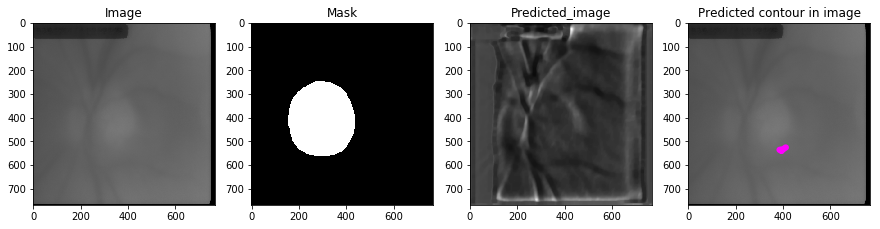

<Figure size 432x288 with 0 Axes>

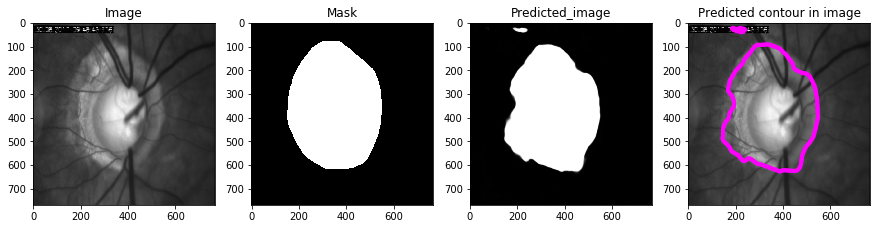

<Figure size 432x288 with 0 Axes>

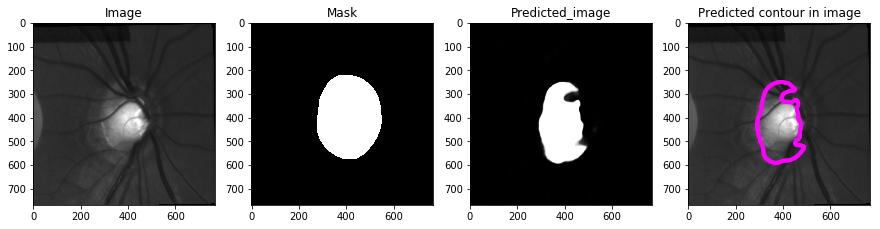

<Figure size 432x288 with 0 Axes>

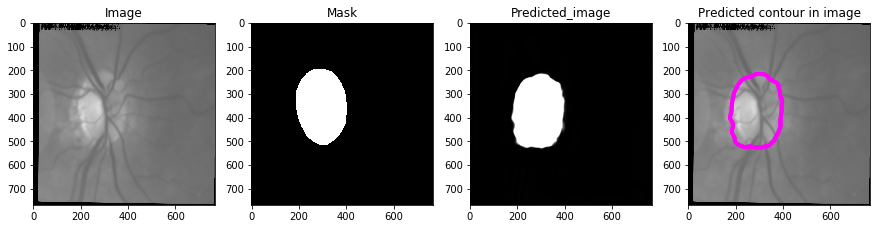

<Figure size 432x288 with 0 Axes>

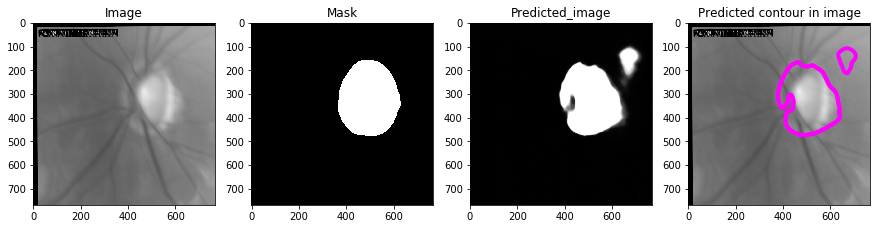

<Figure size 432x288 with 0 Axes>

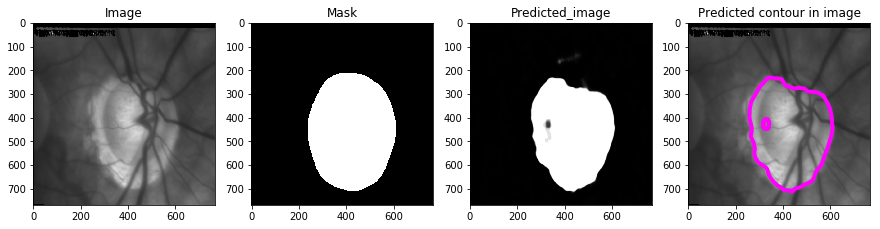

<Figure size 432x288 with 0 Axes>

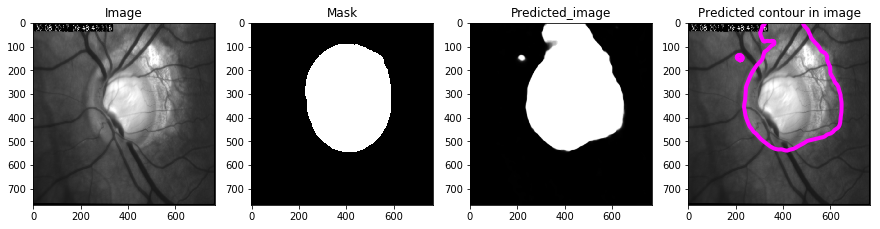

<Figure size 432x288 with 0 Axes>

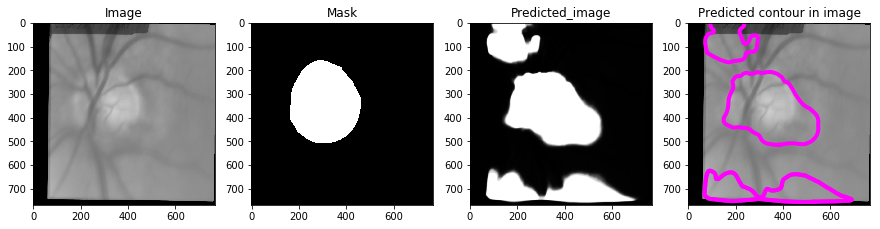

<Figure size 432x288 with 0 Axes>

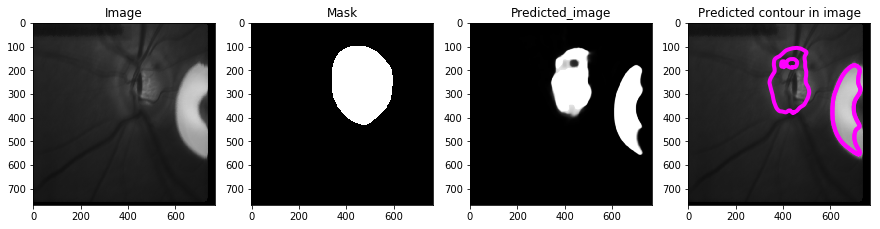

<Figure size 432x288 with 0 Axes>

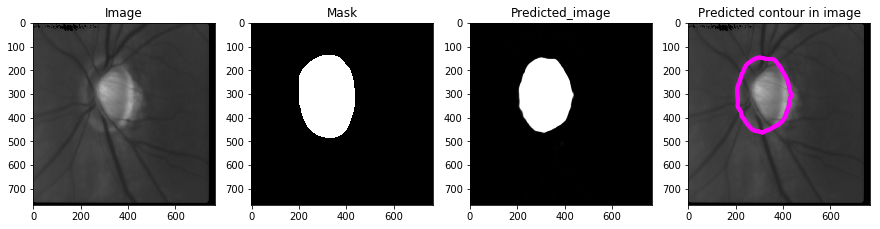

In [13]:
draw_found_contours(process_results._imgs, filtered_images, process_results._masks)